In [2]:
from google.colab import drive
drive.mount('/content/drive')




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
file_path = '/content/drive/My Drive/caltech101.tar.gz'

In [8]:
import zipfile

# Path to the ZIP file in your Google Drive
zip_path = '/content/drive/My Drive/Caltech101/caltech-101.zip'

# Where to extract the files
extract_path = '/content/caltech101'

# Extracting the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Dataset extracted to:", extract_path)


✅ Dataset extracted to: /content/caltech101


In [9]:
# Load and Spli the dataset
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set path to dataset
dataset_path = '/content/caltech101'

# Parameters
img_height, img_width = 180, 180
batch_size = 32

# Create ImageDataGenerators with validation split
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # 80% train, 20% validation
)

# Training set
train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

# Validation set
val_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 0 images belonging to 2 classes.
Found 0 images belonging to 2 classes.


In [10]:
import os

# See what folders exist inside caltech101
for root, dirs, files in os.walk('/content/caltech101'):
    print("Current Folder:", root)
    print("Subfolders:", dirs)
    print("Files:", files[:5])  # Print only first 5 files for brevity
    print("-" * 40)
    break  # Only show top level


Current Folder: /content/caltech101
Subfolders: ['__MACOSX', 'caltech-101']
Files: []
----------------------------------------


In [13]:
data_dir = '/content/caltech101/__MACOSX/caltech-101'  # Corrected path

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale and prepare data
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = datagen.flow_from_directory(
    data_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    data_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.


In [16]:
data_dir = '/content/caltech101/caltech-101'  # ✅ Correct path

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale and prepare data
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = datagen.flow_from_directory(
    data_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    data_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.


In [17]:
import os

root_dir = '/content/caltech101/caltech-101'

for root, dirs, files in os.walk(root_dir):
    level = root.replace(root_dir, '').count(os.sep)
    indent = ' ' * 2 * (level)
    print(f"{indent}{os.path.basename(root)}/")
    subindent = ' ' * 2 * (level + 1)
    for f in files[:3]:  # show first 3 files
        print(f"{subindent}{f}")
    if level == 1:
        break  # stop after first class folder for now


caltech-101/
  101_ObjectCategories.tar.gz
  show_annotation.m
  Annotations.tar


In [18]:
import tarfile

# Path to the .tar.gz file inside the extracted zip
tar_path = '/content/caltech101/caltech-101/101_ObjectCategories.tar.gz'
extract_to = '/content/caltech101/caltech-101/101_ObjectCategories'

# Extract the tar.gz
with tarfile.open(tar_path, 'r:gz') as tar:
    tar.extractall(path=extract_to)

print("✅ Images extracted successfully!")


✅ Images extracted successfully!


In [19]:
data_dir = '/content/caltech101/caltech-101/101_ObjectCategories'


In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = datagen.flow_from_directory(
    data_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    data_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 7316 images belonging to 1 classes.
Found 1828 images belonging to 1 classes.


In [22]:
import os

root_dir = '/content/caltech101/caltech-101/101_ObjectCategories'
subfolders = os.listdir(root_dir)

print(f"Total folders inside '101_ObjectCategories': {len(subfolders)}")
print("First 10 class folders:", subfolders[:10])


Total folders inside '101_ObjectCategories': 1
First 10 class folders: ['101_ObjectCategories']


In [23]:
data_dir = '/content/caltech101/caltech-101/101_ObjectCategories/101_ObjectCategories'


In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = datagen.flow_from_directory(
    data_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    data_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 7356 images belonging to 102 classes.
Found 1788 images belonging to 102 classes.


In [25]:
# Create a shortcut path
import os

# Define the full original path
original_path = '/content/drive/My Drive/Caltech101/101_ObjectCategories'

# Create a shorter alias
short_path = '/content/Caltech101'

# Make a symlink (shortcut)
if not os.path.exists(short_path):
    os.symlink(original_path, short_path)


In [26]:
import os

# Check if the shortcut path exists and show some folders
print("Short path exists:", os.path.exists('/content/Caltech101'))
print("Folders inside short path:", os.listdir('/content/Caltech101')[:5])


Short path exists: False


FileNotFoundError: [Errno 2] No such file or directory: '/content/Caltech101'

In [27]:
'/content/caltech101/caltech-101/101_ObjectCategories'


'/content/caltech101/caltech-101/101_ObjectCategories'

In [28]:
import os

original_path = '/content/caltech101/caltech-101/101_ObjectCategories'
shortcut_path = '/content/Caltech101'

# Create shortcut if it doesn't exist
if not os.path.exists(shortcut_path):
    os.symlink(original_path, shortcut_path)
    print("✅ Shortcut created at /content/Caltech101")
else:
    print("⚠️ Shortcut already exists.")


FileExistsError: [Errno 17] File exists: '/content/caltech101/caltech-101/101_ObjectCategories' -> '/content/Caltech101'

In [29]:
import os

print("Shortcut exists:", os.path.exists('/content/Caltech101'))
print("Classes (folders) found:", os.listdir('/content/Caltech101')[:5])


Shortcut exists: False


FileNotFoundError: [Errno 2] No such file or directory: '/content/Caltech101'

In [30]:
import os

original_path = '/content/caltech101/caltech-101/101_ObjectCategories'
shortcut_path = '/content/Caltech101'

# Remove existing broken shortcut if any
if os.path.islink(shortcut_path) or os.path.exists(shortcut_path):
    os.unlink(shortcut_path)

# Create a new shortcut
os.symlink(original_path, shortcut_path)
print("✅ Shortcut created successfully!")

# Verify
print("Shortcut exists:", os.path.exists(shortcut_path))
print("Sample class folders:", os.listdir(shortcut_path)[:5])


✅ Shortcut created successfully!
Shortcut exists: True
Sample class folders: ['101_ObjectCategories']


In [31]:
import os

# Correct target path (where class folders are)
original_path = '/content/caltech101/caltech-101/101_ObjectCategories'
shortcut_path = '/content/Caltech101'

# Remove old incorrect shortcut if needed
if os.path.islink(shortcut_path) or os.path.exists(shortcut_path):
    os.unlink(shortcut_path)

# Create correct shortcut
os.symlink(original_path, shortcut_path)
print("✅ Correct shortcut created at '/content/Caltech101'")

# Check folders
print("Sample class folders:", os.listdir(shortcut_path)[:5])


✅ Correct shortcut created at '/content/Caltech101'
Sample class folders: ['101_ObjectCategories']


In [34]:
data_dir = '/content/Caltech101'


In [35]:
import os

# This is the FINAL correct path
original_path = '/content/caltech101/caltech-101/101_ObjectCategories/101_ObjectCategories'
shortcut_path = '/content/Caltech101'

# Remove previous incorrect shortcut if it exists
if os.path.islink(shortcut_path) or os.path.exists(shortcut_path):
    os.unlink(shortcut_path)

# Create shortcut
os.symlink(original_path, shortcut_path)
print("✅ Final shortcut created at '/content/Caltech101'")
print("Sample class folders:", os.listdir(shortcut_path)[:5])


✅ Final shortcut created at '/content/Caltech101'
Sample class folders: ['pyramid', 'hawksbill', 'pizza', 'euphonium', 'ferry']


In [36]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_dir = '/content/Caltech101'  # Using the clean shortcut

# Normalize pixel values and split for validation
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = datagen.flow_from_directory(
    data_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    data_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 7356 images belonging to 102 classes.
Found 1788 images belonging to 102 classes.


In [37]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Build a simple CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(102, activation='softmax')  # 102 classes
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 102)                 │          13,158 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,317,798 (12.66 MB)

 Trainable params: 3,317,798 (12.66 MB)

 Non-trainable params: 0 (0.00 B)

In [38]:
# Train the model
history = model.fit(
    train_data,
    epochs=10,
    validation_data=val_data
)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


230/230 ━━━━━━━━━━━━━━━━━━━━ 21s 69ms/step - accuracy: 0.2243 - loss: 3.8050 - val_accuracy: 0.3658 - val_loss: 2.9119
Epoch 2/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - accuracy: 0.4729 - loss: 2.3468 - val_accuracy: 0.4927 - val_loss: 2.3140
Epoch 3/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - accuracy: 0.6679 - loss: 1.3722 - val_accuracy: 0.5487 - val_loss: 2.0736
Epoch 4/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - accuracy: 0.8177 - loss: 0.6818 - val_accuracy: 0.5201 - val_loss: 2.5970
Epoch 5/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - accuracy: 0.9274 - loss: 0.2728 - val_accuracy: 0.5285 - val_loss: 3.1816
Epoch 6/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 11s 47ms/step - accuracy: 0.9635 - loss: 0.1448 - val_accuracy: 0.5347 - val_loss: 3.5748
Epoch 7/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - accuracy: 0.9761 - loss: 0.0922 - val_accuracy: 0.5162 - val_loss: 3.7875
Epoch 8/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - accuracy: 0.9786 - loss: 0.0842 - val_accuracy

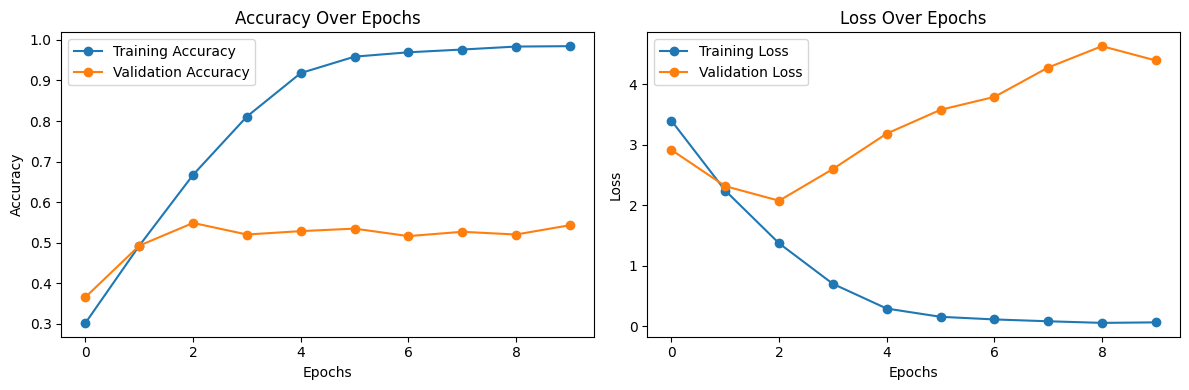

In [39]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
